In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import pylab
import statsmodels.api as sm 
import statsmodels.stats.multicomp
from sklearn.model_selection import train_test_split
from random import choice
from pylab import legend,plot,show,title,xlabel,ylabel
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm, t
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
from collections import Counter
from numpy import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.formula.api as smf 
from statsmodels.discrete.discrete_model import Poisson as psn
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os 

In [2]:
os.getcwd()

'C:\\Users\\HP'

In [3]:
os.chdir(r'D:\DBDA\ML\Leads Case Study')

In [4]:
df = pd.read_csv("Leads.csv") 
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df = df.drop('Last Notable Activity',axis=1)

In [6]:
df.shape

(9240, 36)

In [7]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

Checking duplicates

In [8]:
sum(df.duplicated(subset='Prospect ID'))

0

In [9]:
sum(df.duplicated(subset='Lead Number'))

0

Since the values in these columns are unique we can drop both the columns 

In [10]:
df = df.drop(['Prospect ID','Lead Number'],axis=1)

Checking for Null Values 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [12]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

As the select values are null since the user did not select any values We replace it with null values.

In [13]:
df.replace('Select' , np.nan , inplace=True)

Checking percentage for null values in columns

In [14]:
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
df = df.drop(df.loc[:,list(100*(df.isnull().sum()/len(df.index))>70)].columns,axis=1)
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Filling the null values.

For Lead Quality

In [16]:
df['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_6648\1620886599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Lead Quality'],palette='mako')


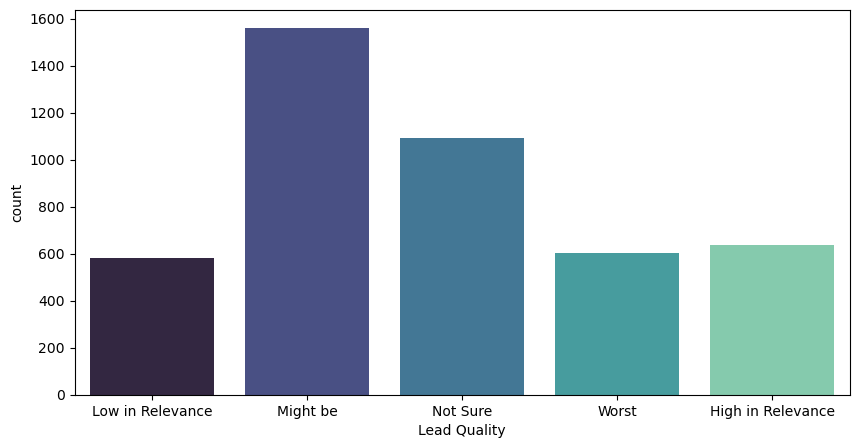

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Lead Quality'],palette='mako')
plt.show()

In [18]:
df['Lead Quality'] = df['Lead Quality'].fillna('Not Sure')

In [19]:
df['Lead Quality'].value_counts()

Lead Quality
Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

For Asymmetrique Activity Index , 
Asymmetrique Profile Inde , 
Asymmetrique Activity Scor,e5
Asymmetrique Profile Score 

C:\Users\HP\AppData\Local\Temp\ipykernel_6648\1223638653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Asymmetrique Activity Index'],palette='mako')
C:\Users\HP\AppData\Local\Temp\ipykernel_6648\1223638653.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Asymmetrique Profile Index'],palette='mako')


<Axes: xlabel='Asymmetrique Profile Index', ylabel='count'>

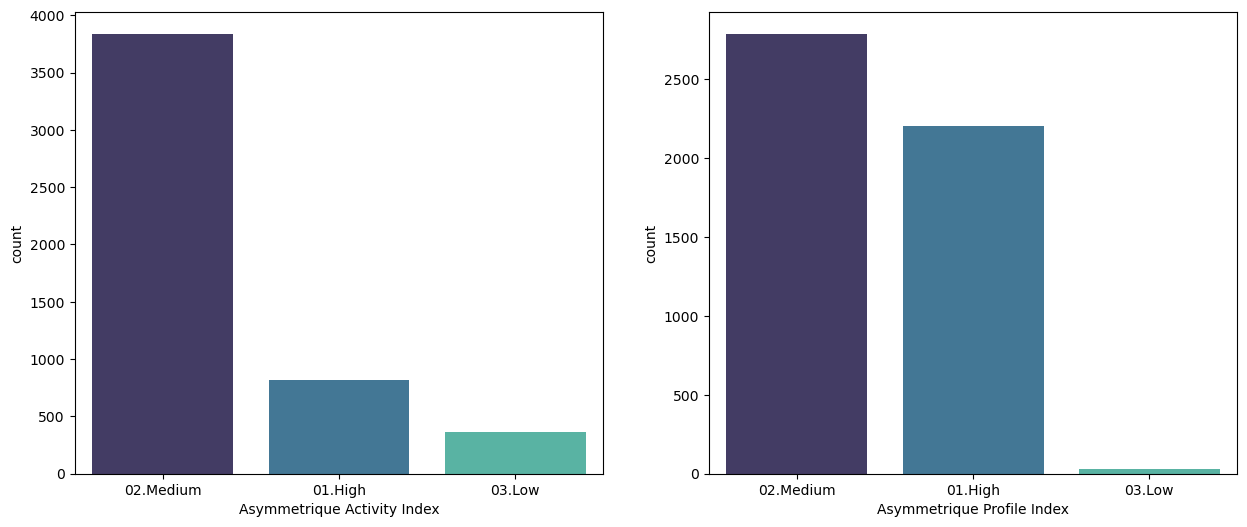

In [20]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x=df['Asymmetrique Activity Index'],palette='mako')

plt.subplot(1,2,2)
sns.countplot(x=df['Asymmetrique Profile Index'],palette='mako')

<Axes: ylabel='Asymmetrique Profile Score'>

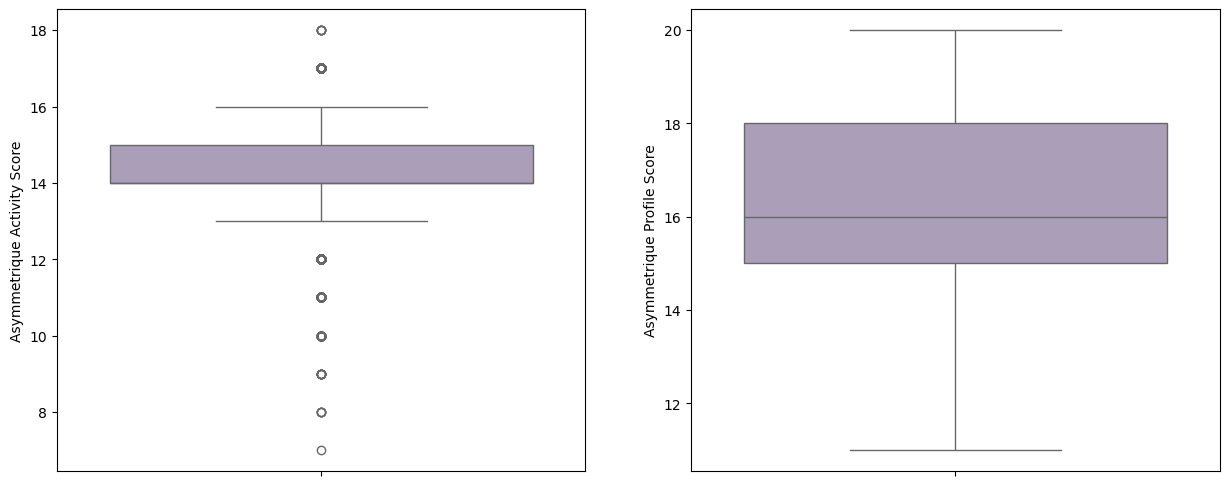

In [21]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(y=df['Asymmetrique Activity Score'],color='#A99ABD')

plt.subplot(1,2,2)
sns.boxplot(y=df['Asymmetrique Profile Score'],color='#A99ABD')

Due to large spread of data it is difficult to fill the fields with specific value.So we drop these columns.

In [22]:
df = df.drop(columns=['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

For City

In [23]:
df['City'].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_6648\1582613459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['City'],palette='mako')


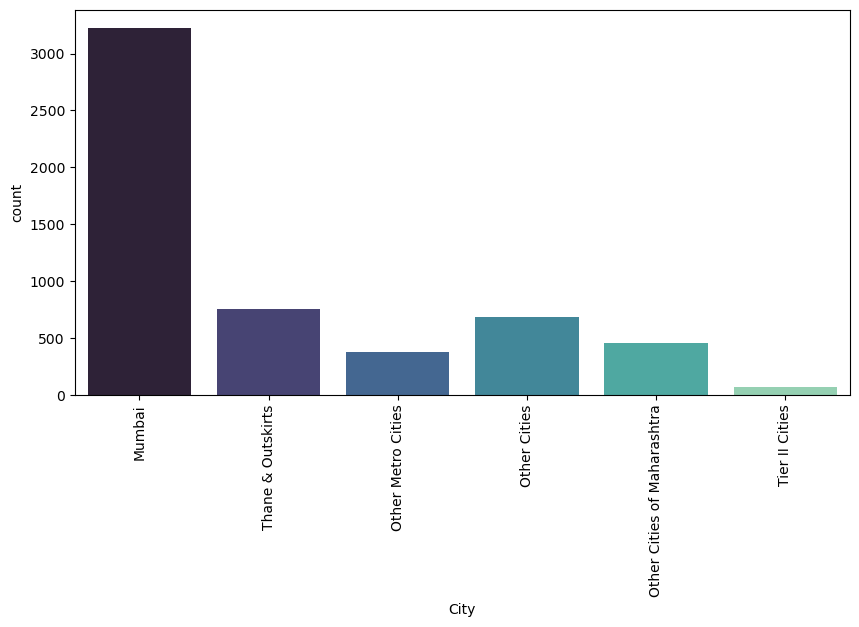

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['City'],palette='mako')
plt.xticks(rotation=90)
plt.show()

In [25]:
df['City'] = df['City'].fillna('Other Cities')

In [26]:
df['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_6648\2687994081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Specialization'],palette='mako')


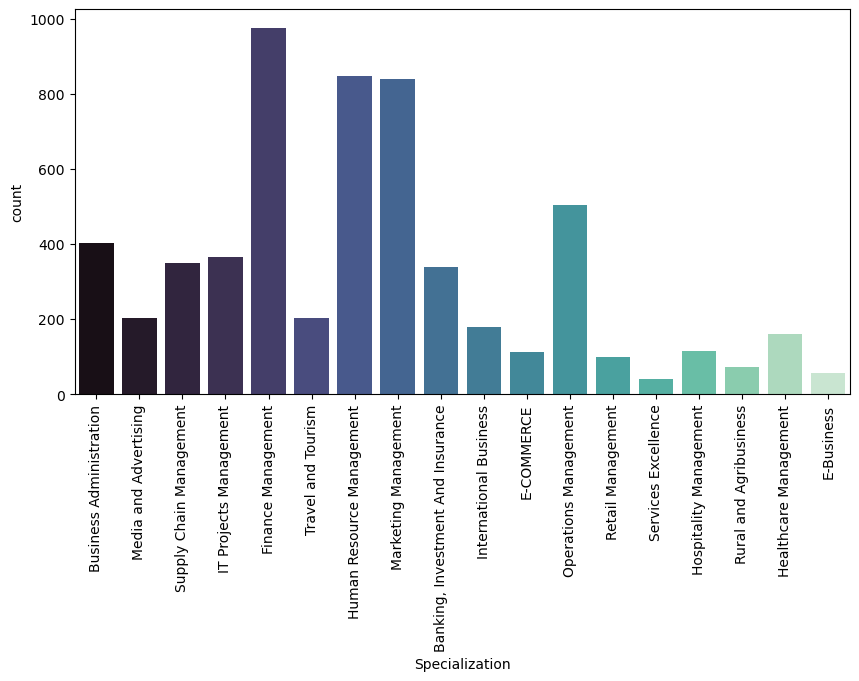

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Specialization'],palette='mako')
plt.xticks(rotation=90)
plt.show()

Since 36% of the users have not selected any value for specialization from the given list does not have any value called 'Other',so any student who is looking for some other specialization than the listed ones has left the field bank . So we impute the Nulls in this column with Other and that can also be used as an analysis point 

In [28]:
df['Specialization'] = df['Specialization'].fillna('Other Specialization')

In [29]:
print(df['What matters most to you in choosing a course'].value_counts())

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_6648\3843351046.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['What matters most to you in choosing a course'] , palette='mako')


<function matplotlib.pyplot.show(close=None, block=None)>

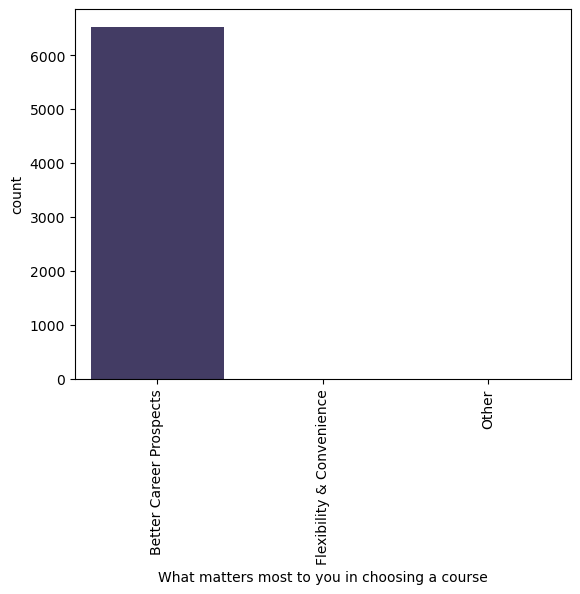

In [30]:
sns.countplot(x=df['What matters most to you in choosing a course'] , palette='mako')
plt.xticks(rotation = 90)
plt.show

We can replace the missing values with better carrer prospects

In [31]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [32]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_6648\3282967911.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['What is your current occupation'], palette='mako')


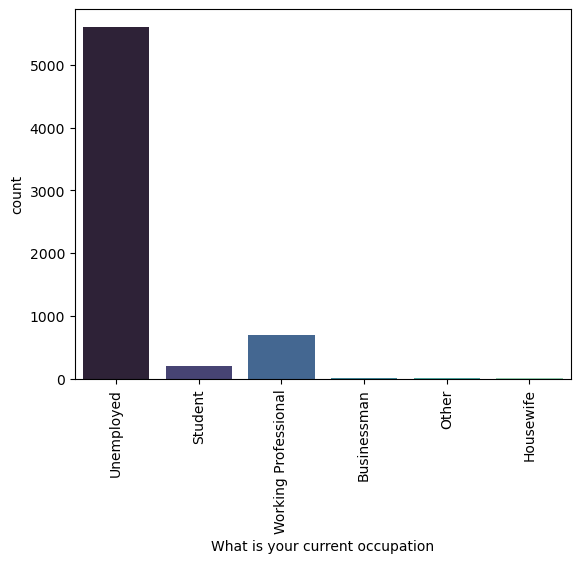

In [33]:
sns.countplot(x=df['What is your current occupation'], palette='mako')
plt.xticks(rotation = 90)
plt.show()

In [34]:
df['What is your current occupation'] = df['What is your current occupation'].fillna('Unemployed')

In [35]:
df['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

C:\Users\HP\AppData\Local\Temp\ipykernel_6648\2787935320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Country'], palette='mako')


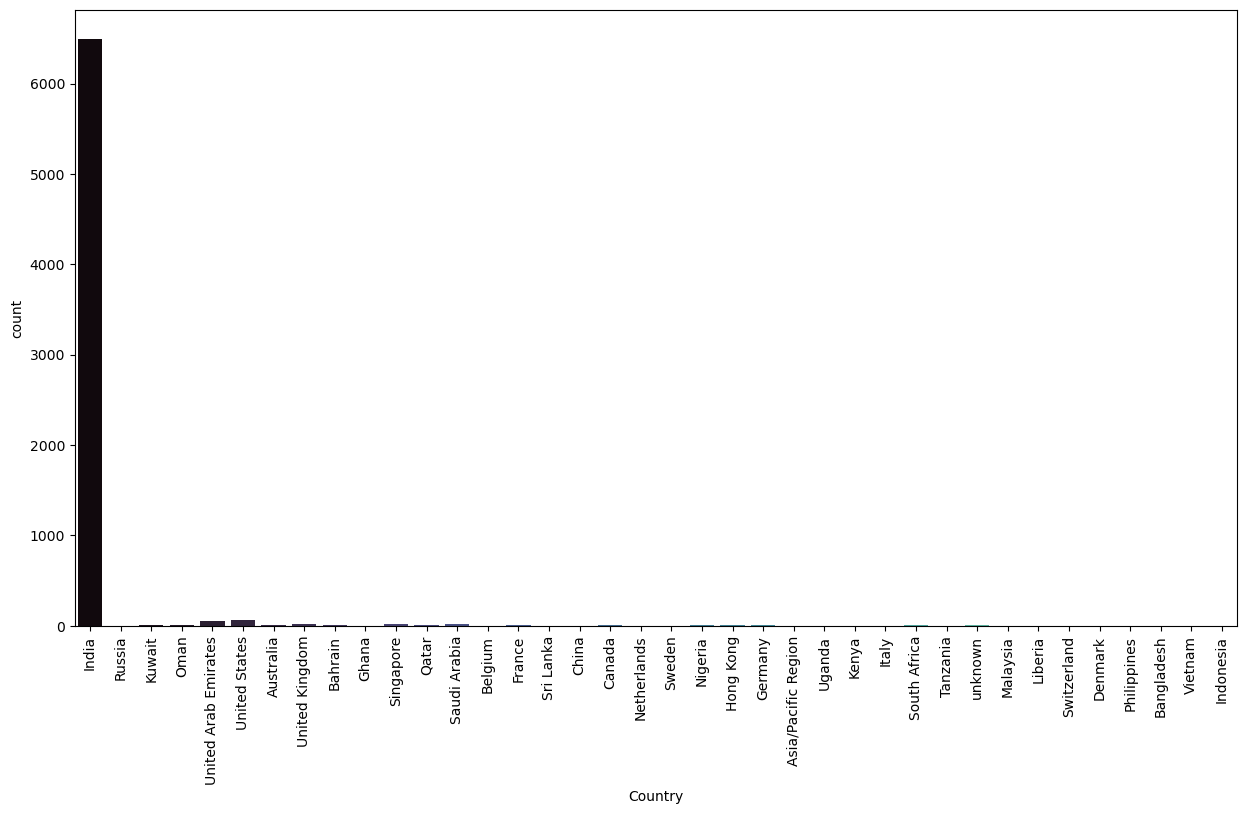

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['Country'], palette='mako')
plt.xticks(rotation = 90) 
plt.show()

In [37]:
df['Country'] = df['Country'].fillna('unknown')

Rest all the columns have less than 2% null values thus we can remove those rows

In [38]:
df = df.dropna()

In [39]:
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5747 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    5747 non-null   object 
 1   Lead Source                                    5747 non-null   object 
 2   Do Not Email                                   5747 non-null   object 
 3   Do Not Call                                    5747 non-null   object 
 4   Converted                                      5747 non-null   int64  
 5   TotalVisits                                    5747 non-null   float64
 6   Total Time Spent on Website                    5747 non-null   int64  
 7   Page Views Per Visit                           5747 non-null   float64
 8   Last Activity                                  5747 non-null   object 
 9   Country                                        5747 non-n

In [41]:
df.columns 

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [42]:
dfdeg = df

Dropping the Columns which have Continuous Data so we can apply Degree of Association on Categorical columns

In [43]:
dfdeg = dfdeg.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'],axis=1)

In [44]:
dfdeg.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [45]:
categorical_columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

Using Chi2 Degree Of Association To find those categorical columns which are significant.

In [46]:
from scipy.stats import chi2_contingency
r = []
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['Converted'])
    expected = stats.chi2_contingency(contingency_table)
    r.append({'Column': column,'P-Value': expected[1]})

In [47]:
r = pd.DataFrame(r)
sorted =r.sort_values(by='P-Value',ascending=False)
sorted

,Column,P-Value
12,X Education Forums,1.000000e+00
13,Newspaper,1.000000e+00
22,I agree to pay the amount through cheque,1.000000e+00
20,Get updates on DM Content,1.000000e+00
19,Update me on Supply Chain Content,1.000000e+00
16,Receive More Updates About Our Courses,1.000000e+00
10,Magazine,1.000000e+00
14,Digital Advertisement,1.000000e+00
9,Search,9.745467e-01
11,Newspaper Article,9.280217e-01


Dropping those columns whose pval are > 0.05 which are not significant.

In [48]:
df = df.drop(['X Education Forums','I agree to pay the amount through cheque','Receive More Updates About Our Courses','Digital Advertisement','Newspaper','Magazine','Update me on Supply Chain Content','Get updates on DM Content','Search','Newspaper Article','Do Not Call','What matters most to you in choosing a course','Through Recommendations','A free copy of Mastering The Interview'],axis=1)

In [49]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,Lead Quality,City
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,unknown,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Other Cities
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Other Specialization,Unemployed,Ringing,Not Sure,Other Cities
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Other Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai


In [50]:
df.shape

(5747, 14)

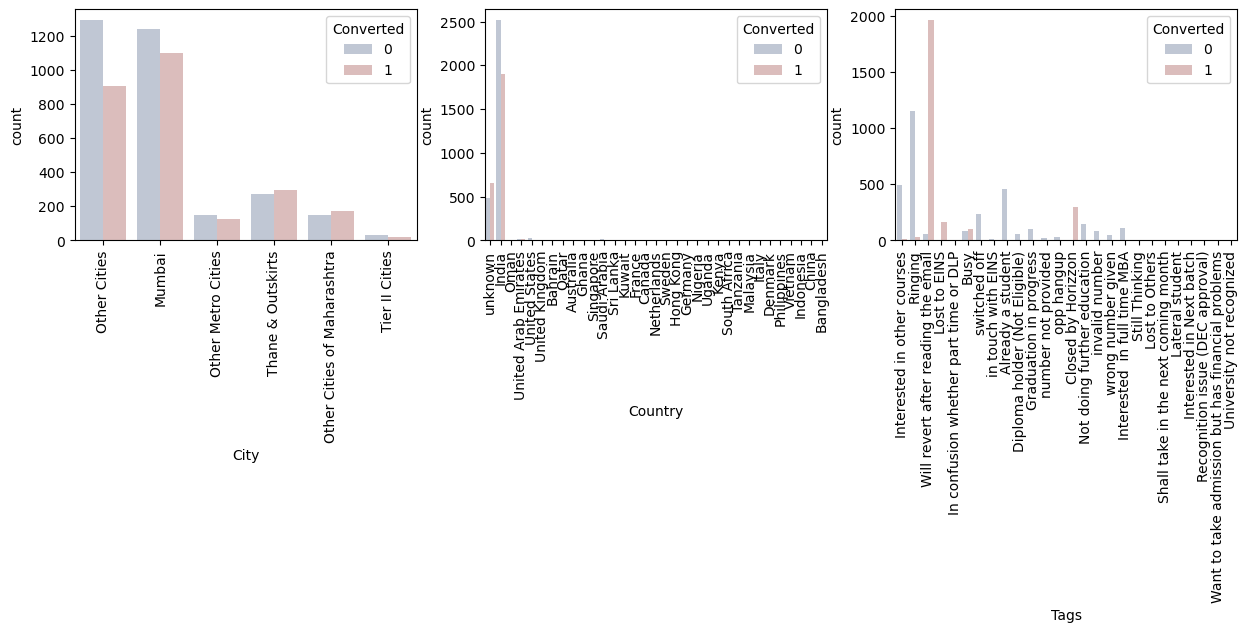

In [51]:
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
sns.countplot(x=df.City,hue=df.Converted,palette='vlag')
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.countplot(x=df.Country,hue=df.Converted,palette='vlag')
plt.xticks(rotation=90)


plt.subplot(1,3,3)
sns.countplot(x=df.Tags,hue=df.Converted,palette='vlag')
plt.xticks(rotation=90)

plt.show()

Dropping Country column as the data is very imbalance 

In [52]:
df = df.drop(['Country'],axis=1)

In [53]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'Lead Quality', 'City'],
      dtype='object')

Checking Correlation between Continuous Columns

In [54]:
df1 = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]

In [55]:
df1.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
TotalVisits,1.000000,0.190178,0.470143,0.025496
Total Time Spent on Website,0.190178,1.000000,0.294111,0.342177
Page Views Per Visit,0.470143,0.294111,1.000000,-0.036612
Converted,0.025496,0.342177,-0.036612,1.000000


<Axes: >

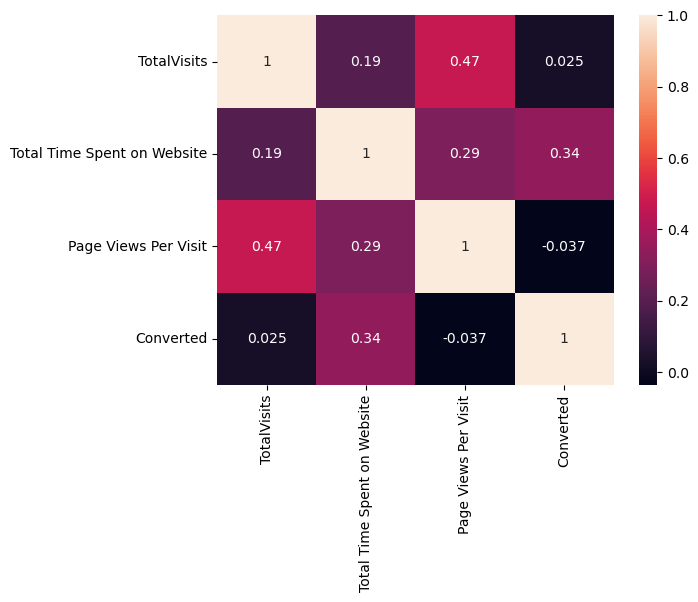

In [56]:
sns.heatmap(df1.corr(),annot=True)

To Calculate VIF for Continuous columns for Feature Selection

In [57]:
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
print(vif)

                      Features       VIF
0                  TotalVisits  2.023586
1  Total Time Spent on Website  2.405806
2         Page Views Per Visit  2.679732
3                    Converted  1.769414


In [58]:
scipy.stats.pearsonr(df['TotalVisits'],df['Converted'])  

PearsonRResult(statistic=0.02549562157153356, pvalue=0.053274332884342135)

In [59]:
scipy.stats.pearsonr(df['Total Time Spent on Website'],df['Converted'])  

PearsonRResult(statistic=0.34217651729354226, pvalue=1.3797829881016774e-157)

In [60]:
scipy.stats.pearsonr(df['Page Views Per Visit'],df['Converted'])  

PearsonRResult(statistic=-0.03661213665944077, pvalue=0.005505671691085303)

In the Continuous Data the pval of all the columns are significant and cannot be ignored so Total Visits,Total Time Spent on Website,Page Views Per Visit significantly impact on Converted.  

Creating dummies for categorical columns

In [61]:
# Convert 'Yes' to 1 and 'No' to 0 in the "Do Not Email" column
df['Do Not Email'] = df['Do Not Email'].replace({'Yes': 1, 'No': 0})

# Verify the changes
print(df['Do Not Email'].head())

0    0
1    0
2    0
3    0
4    0
Name: Do Not Email, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_6648\1098121750.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Do Not Email'] = df['Do Not Email'].replace({'Yes': 1, 'No': 0})


In [62]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Other Cities
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Other Cities
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai


In [63]:
dum = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City']], drop_first=True).astype(int)

In [64]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [65]:
dum.isnull().sum()

Lead Origin_Landing Page Submission                       0
Lead Origin_Lead Add Form                                 0
Lead Origin_Lead Import                                   0
Lead Source_Direct Traffic                                0
Lead Source_Facebook                                      0
Lead Source_Google                                        0
Lead Source_Live Chat                                     0
Lead Source_Olark Chat                                    0
Lead Source_Organic Search                                0
Lead Source_Pay per Click Ads                             0
Lead Source_Press_Release                                 0
Lead Source_Reference                                     0
Lead Source_Referral Sites                                0
Lead Source_Social Media                                  0
Lead Source_WeLearn                                       0
Lead Source_Welingak Website                              0
Lead Source_bing                        

In [66]:
df = pd.concat([df, dum], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Other Cities,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Other Cities,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No

In [67]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City'], axis = 1)

In [68]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [69]:
x_train = df.drop('Converted',axis=1)
y_train = df.Converted

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=20)


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
5901,0,2.361332,-0.523169,1.328201,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2677,0,-0.723363,-0.965751,-1.247288,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
48,0,0.433397,1.220389,1.651950,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8270,0,0.047810,-0.464278,0.685537,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9031,1,0.047810,1.855709,0.685537,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [72]:
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
res=logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4597
Model:                            GLM   Df Residuals:                     4504
Model Family:                Binomial   Df Model:                           92
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -487.65
Date:                Wed, 01 Jan 2025   Deviance:                       975.30
Time:                        17:45:42   Pearson chi2:                 4.85e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6883
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [73]:
pred = res.predict(sm.add_constant(x_test))

In [74]:
prediction_nominal = [0 if x < 0.5 else 1 for x in pred]

In [75]:
print(confusion_matrix(y_test,prediction_nominal))

[[ 84 537]
 [  2 527]]


In [76]:
print(classification_report(y_test,prediction_nominal))

              precision    recall  f1-score   support

           0       0.98      0.14      0.24       621
           1       0.50      1.00      0.66       529

    accuracy                           0.53      1150
   macro avg       0.74      0.57      0.45      1150
weighted avg       0.76      0.53      0.43      1150



- Significant Variables:
  
Total Time Spent on Website (p < 0.001): This variable has the highest positive impact on conversion, indicating that users spending more time on the website are more likely to convert.
Tags:
"Busy", "Closed by Horizzon", "Graduation in progress", "Shall take in the next coming month", "Will revert after reading the email", and "In touch with EINS" have significant positive effects (p < 0.05), suggesting these tags are predictive of conversion.
What is your current occupation:
"Student", "Unemployed", and "Working Professional" are positively associated with conversion (p < 0.05).
Lead Quality:
Categories such as "Low in Relevance", "Might be", and "Not Sure" have significant negative effects (p < 0.05), indicating lower likelihood of conversion.
Non-Significant Variables:

Many categorical variables like "Lead Source", "Lead Origin", and "Last Activity" are statistically insignificant (p > 0.05). These variables do not provide strong evidence of impact on conversion in this model.
Some "Specialization" categories and most "City" categories also show no significant relationship with conversion.
Model Performance:

The Pseudo R-squared (CS) value of 0.6883 suggests that the model explains a substantial portion (68.83%) of the variance in conversion, indicating good predictive capability.
The Log-Likelihood (-487.65) and Deviance (975.30) values indicate model fit, but the high Pearson Chi-squared (4850) suggests potential over-dispersion or a large number of insignificant variables in the model.
Interpretation of Coefficients:

Positive coefficients indicate variables that increase the likelihood of conversion, while negative coefficients decrease it.
For continuous variables like "TotalVisits" and "Total Time Spent on Website", higher values positively impact conversion likelihood.
For categorical variables, the presence of significant tags (like "Busy" or "Closed by Horizzon") increases the likelihood of conversion, while low-quality leads (e.g., "Worst") decrease it.
Issues in the Model:

Extremely high standard errors for many variables (e.g., "Lead Origin_Lead Add Form", "Lead Source_Facebook") suggest multicollinearity or sparse data in some categories.
Insignificant p-values (p > 0.05) for most dummy variables imply that these categories might not contribute significantly to the model and could be excluded for simplification.

- Recommendations:
  
1. Focus on actionable variables like Total Time Spent on Website, Tags, and Current Occupation to improve conversion rates.
2. Remove or combine insignificant variables with high standard errors to refine the model.
3. Address potential multicollinearity and recheck the variable significance after removing redundant predictors.
4. Leverage significant positive tags and lead quality metrics to prioritize high-conversion potential leads.